---
title: Moving Average Models
---

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Some simulations from the MA(1) model

Below are some simulated data from the MA(1) model. Recall that the MA(1) model is: 
\begin{align*}
   y_t = \mu + \epsilon_t + \theta \epsilon_{t-1}
\end{align*}
where $\epsilon_t$ is i.i.d $N(0, \sigma^2)$. Note that if $\theta = 0$, the model is just $\mu + \epsilon_t$ which is i.i.d $N(\mu, \sigma^2)$ so the standard i.i.d normal model is a special case of MA(1). Below is simulated data from i.i.d $N(\mu, \sigma^2)$ with $\mu = 0$ and $\sigma = 1$ (in other words, this is MA(1) with $\theta = 0, \mu = 0, \sigma = 1$). We call this the Gaussian White Noise. 

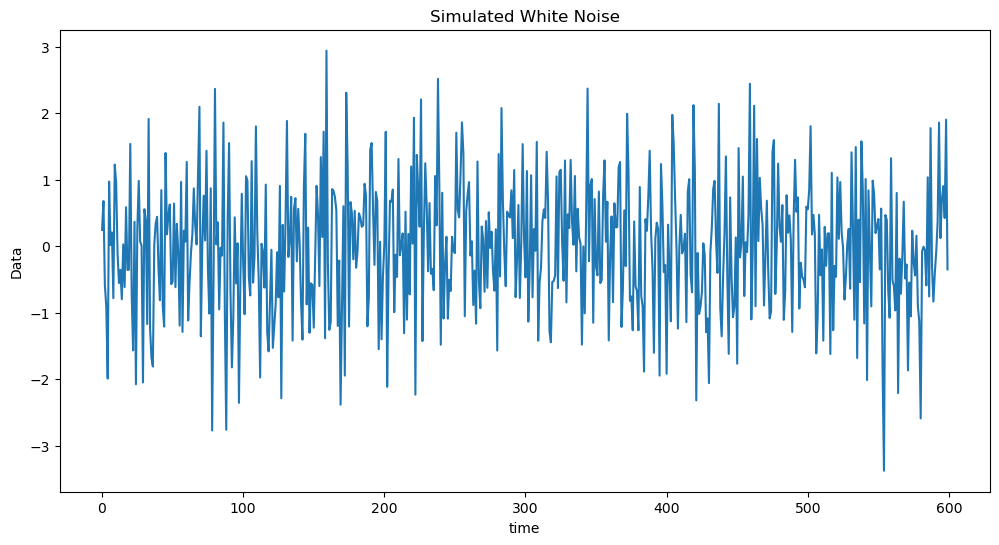

In [183]:
#Simulating from Gaussian white noise:
n = 600
seed = 43
rng = np.random.default_rng(seed)
sig = 1
y_wn = rng.normal(loc = 0, scale = sig, size = n)
plt.figure(figsize = (12, 6))
plt.plot(y_wn)
plt.xlabel('time')
plt.ylabel('Data')
plt.title('Simulated White Noise')
plt.show()


Next we shall simulate observations from the MA(1) model: $y_t = \mu + \epsilon_t + \theta \epsilon_{t-1}$ with non-zero $\theta$. These data will have some dependence between neighboring data points.  

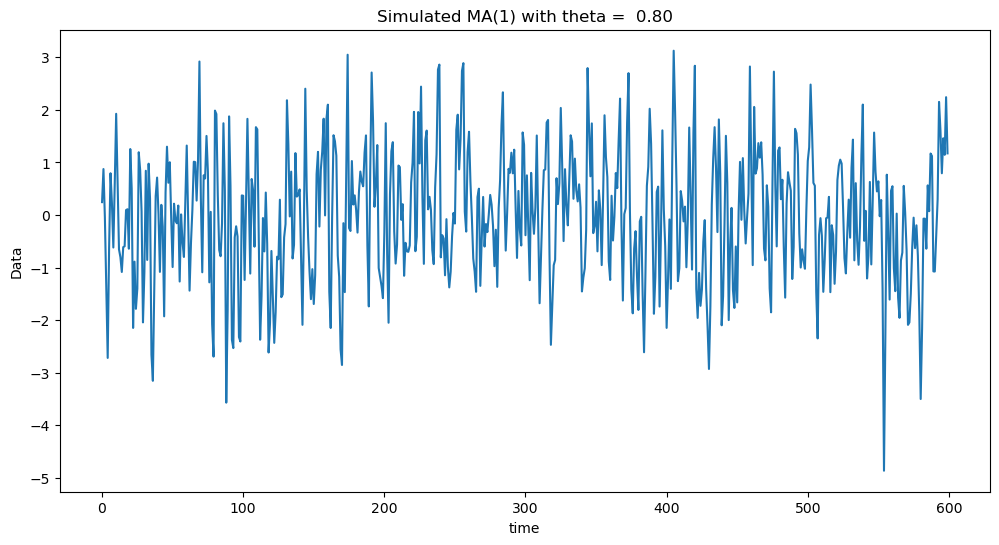

In [184]:
#Simulating MA(1)
y_0 = np.concatenate(([0], y_wn))
theta = 0.8
y_ma = y_0[1:] + theta * y_0[:-1]
plt.figure(figsize = (12, 6))
plt.plot(y_ma)
plt.xlabel('time')
plt.ylabel('Data')
plt.title(f'Simulated MA(1) with theta = {theta: .2f}')
plt.show()


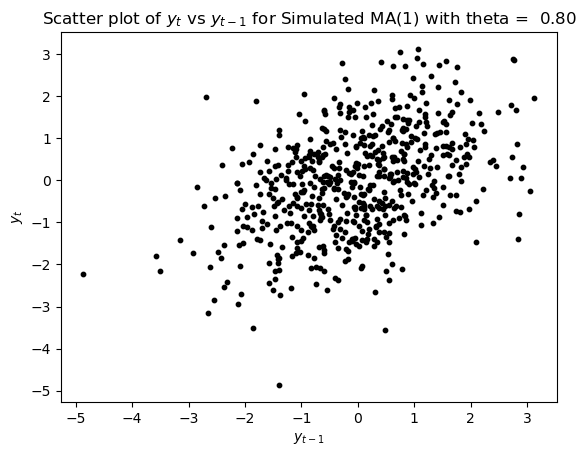

In [185]:
#Here is a scatter plot of y_t vs y_{t-1} for the simulated MA(1) data
plt.scatter(y_ma[:-1], y_ma[1:], s = 10, color = 'black')
plt.xlabel('$y_{t-1}$')
plt.ylabel('$y_{t}$')
plt.title(f'Scatter plot of $y_t$ vs $y_{{t-1}}$ for Simulated MA(1) with theta = {theta: .2f}')    
plt.show()

This positive dependence between $y_t$ and $y_{t-1}$ will make the simulated dataset look smoother compared to white noise. On the other hand, if $\theta < 0$, then the simulated dataset will look more rough compared to white noise. 

Below we plot the white noise observations, together with the simulated MA(1) observations for $\theta = 0.8$ and $\theta = -0.8$. When $\theta > 0$, the autocorrelation at lag one is positive making the data look smoother (compared to white noise). When $\theta < 0$, the autocorrelation at lag one is negative making the data look more wiggly (compared to white noise).

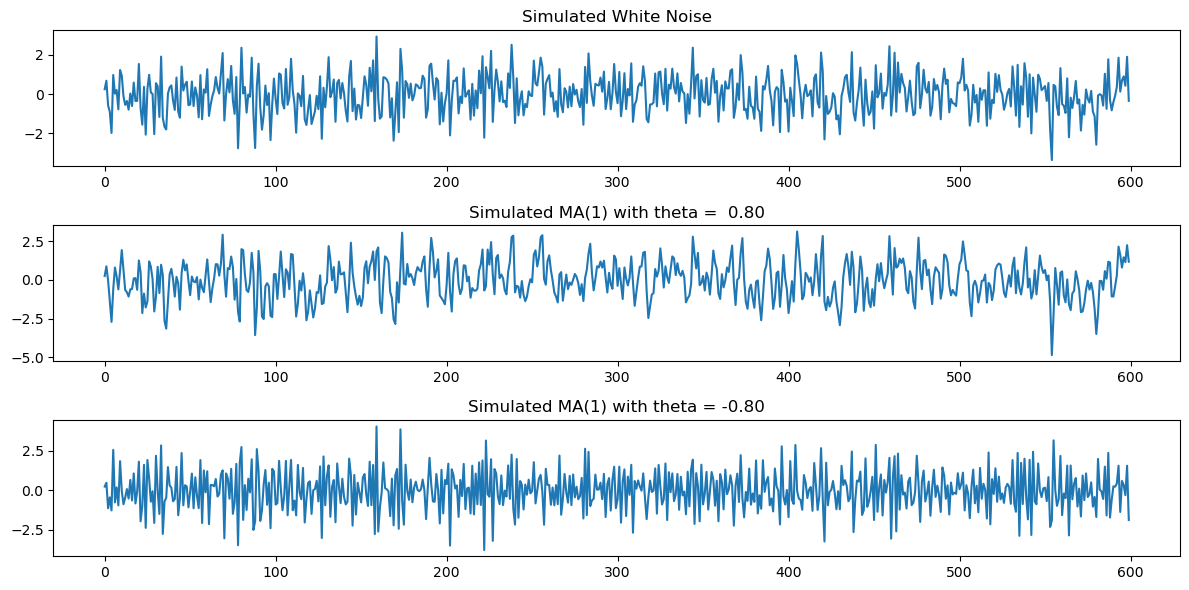

In [186]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (12, 6))


axes[0].plot(y_wn)
axes[0].set_title('Simulated White Noise')

theta = 0.8
y_ma_1 = y_0[1:] + theta * y_0[:-1]
axes[1].plot(y_ma_1)
axes[1].set_title(f'Simulated MA(1) with theta = {theta: .2f}')

theta = -0.8
y_ma_2 = y_0[1:] + theta * y_0[:-1] #y_ma_2 is simulated data from MA(1) with negative theta
axes[2].plot(y_ma_2)
axes[2].set_title(f'Simulated MA(1) with theta = {theta: .2f}')

plt.tight_layout()
plt.show()

## Sample ACF

We can distinguish between these datasets by computing the sample ACF which is defined as follows. Given a time series dataset $y_1, \dots, y_n$ and a **lag** h, define
\begin{equation}
   r_h := \frac{\sum_{t=1}^{n-h} (y_t - \bar{y})(y_{t+h} - \bar{y})}{\sum_{t=1}^n (y_t - \bar{y})^2}
\end{equation}
for $h = 0, 1, 2, \dots$. Here $\bar{y}$ is simply the mean of $z_1, \dots, z_n$. The acf plot graphs $h$ on the x-axis and $r_h$ on the y-axis. The quantity $r_h$ is known as the **sample autocorrelation** of the data at lag $h$ (acf stands for "Autocorrelation Function").

Below we compute the sample ACF. 

1.0


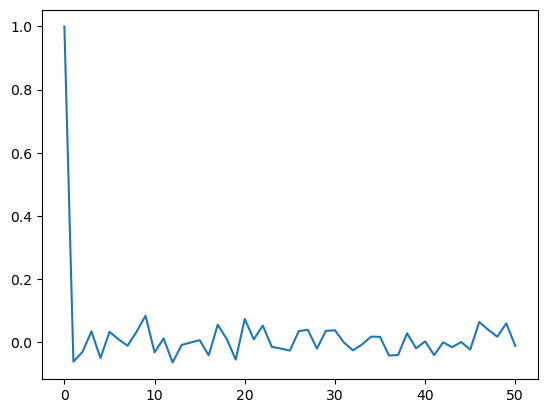

In [187]:
def sample_acf(y, h_max):
    n = len(y)
    y_mean = sum(y) / n
    denominator = sum((y_t - y_mean) ** 2 for y_t in y)
    autocorr = []

    for h in range(h_max + 1):
        numerator = sum((y[t] - y_mean) * (y[t + h] - y_mean) for t in range(n - h))
        r_h = numerator / denominator
        autocorr.append(r_h)

    return autocorr

h_max = 50 
sample_acf_vals = sample_acf(y_wn, h_max)
print(sample_acf_vals[0]) #the sample_acf at lag = 0 always equals 1
plt.plot(range(0, h_max + 1), sample_acf_vals)
plt.show()

Visually, one gets nicer plots for the sample ACF by using the stem plot. 

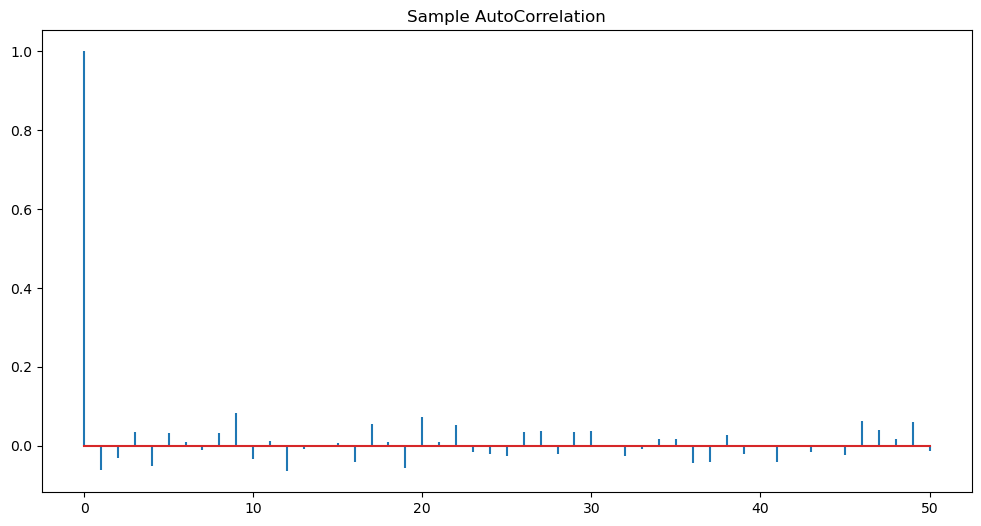

In [188]:
h_max = 50 
sample_acf_vals = sample_acf(y_wn, h_max)
plt.figure(figsize = (12, 6))
markerline, stemline, baseline = plt.stem(range(0, h_max + 1), sample_acf_vals)
markerline.set_marker("None")
plt.title('Sample AutoCorrelation')
plt.show()

Note that the sample ACF always takes the value 1 at $h = 0$ so the first spike is not giving us any information. We only look at the sample ACF for lages $h \geq 1$. From the above ACF plot, it appears that sample ACF values at all $h \geq 1$ are negligible. 

Next we plot the sample ACF for MA(1) for positive as well as negative $\theta$. 

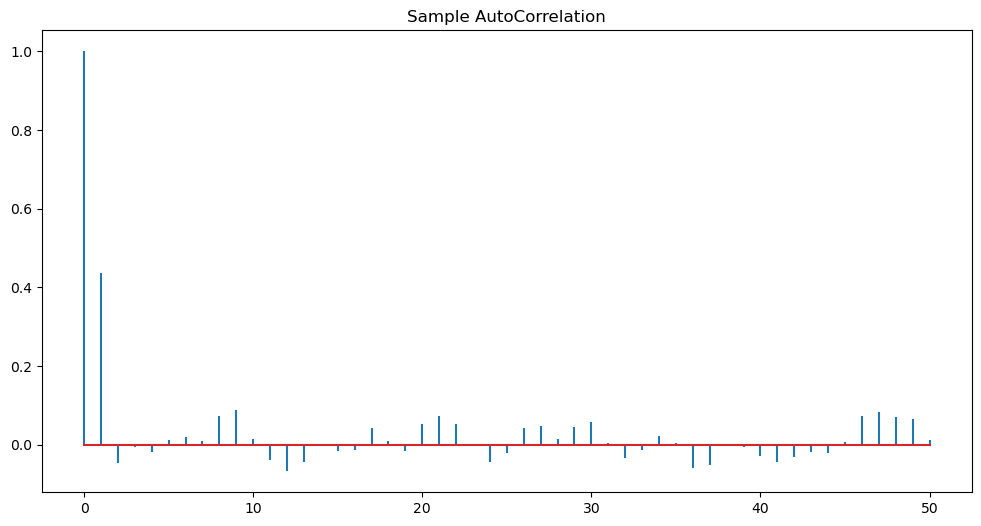

In [189]:
h_max = 50 
sample_acf_vals = sample_acf(y_ma_1, h_max)
plt.figure(figsize = (12, 6))
markerline, stemline, baseline = plt.stem(range(0, h_max + 1), sample_acf_vals)
markerline.set_marker("None")
plt.title('Sample AutoCorrelation')
plt.show()

Observe the peak at lag one above. This is indicative of the MA(1) model. 

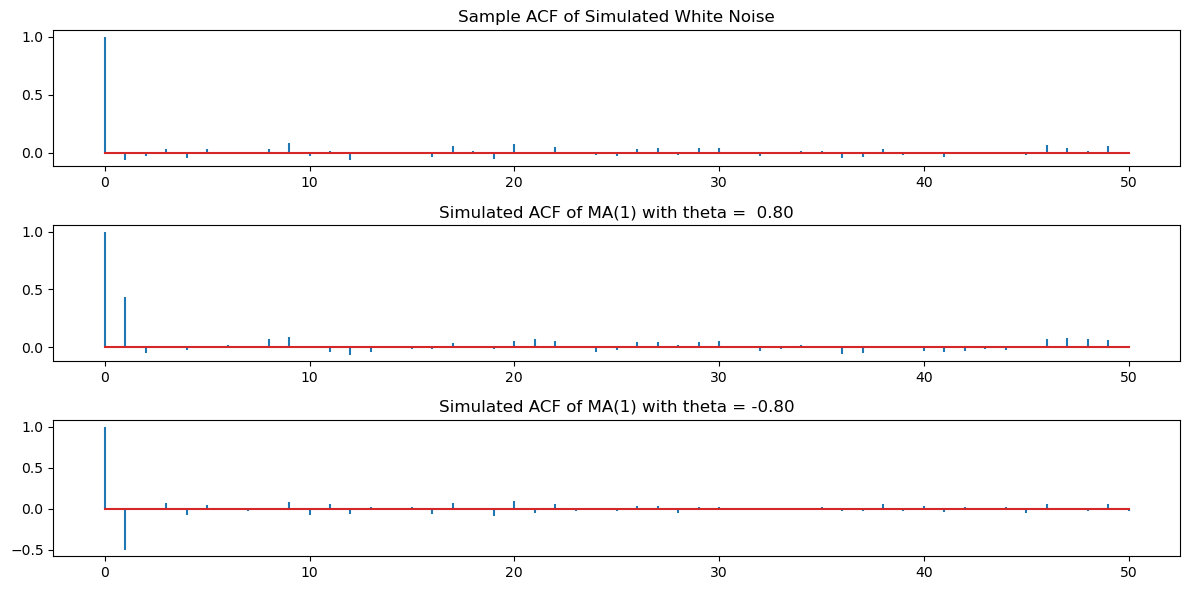

In [190]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (12, 6))

sample_acf_vals_wn = sample_acf(y_wn, h_max)
markerline, stemline, baseline = axes[0].stem(range(0, h_max + 1), sample_acf_vals_wn)
markerline.set_marker("None")
axes[0].set_title('Sample ACF of Simulated White Noise')

sample_acf_vals_ma_1 = sample_acf(y_ma_1, h_max)
markerline, stemline, baseline = axes[1].stem(range(0, h_max + 1), sample_acf_vals_ma_1)
markerline.set_marker("None")
theta = 0.8
axes[1].set_title(f'Simulated ACF of MA(1) with theta = {theta: .2f}')

sample_acf_vals_ma_2 = sample_acf(y_ma_2, h_max)
markerline, stemline, baseline = axes[2].stem(range(0, h_max + 1), sample_acf_vals_ma_2)
markerline.set_marker("None")
theta = -0.8
axes[2].set_title(f'Simulated ACF of MA(1) with theta = {theta: .2f}')

plt.tight_layout()
plt.show()

Clearly, there are spikes at lag one for the second and third datasets. The remaining ACF values are negligible. 

There is an inbuilt function in statsmodels for plotting the sample_acf (and another inbuilt function for plotting the sample_acf). Its use is demonstrated below. Let us check that it gives identical answers to our computation.  

In [191]:
from statsmodels.tsa.stattools import acf

acf_values_wn = acf(y_wn, nlags=h_max)
print(np.column_stack([sample_acf_vals_wn, acf_values_wn]))

[[ 1.00000000e+00  1.00000000e+00]
 [-6.18986853e-02 -6.18986853e-02]
 [-3.16190776e-02 -3.16190776e-02]
 [ 3.37684035e-02  3.37684035e-02]
 [-5.08194511e-02 -5.08194511e-02]
 [ 3.25331941e-02  3.25331941e-02]
 [ 8.74858962e-03  8.74858962e-03]
 [-1.16498128e-02 -1.16498128e-02]
 [ 3.26472220e-02  3.26472220e-02]
 [ 8.33178480e-02  8.33178480e-02]
 [-3.27430872e-02 -3.27430872e-02]
 [ 1.14743957e-02  1.14743957e-02]
 [-6.46748355e-02 -6.46748355e-02]
 [-9.26355222e-03 -9.26355222e-03]
 [-1.48030902e-03 -1.48030902e-03]
 [ 5.98188096e-03  5.98188096e-03]
 [-4.20248527e-02 -4.20248527e-02]
 [ 5.47736551e-02  5.47736551e-02]
 [ 9.57612253e-03  9.57612253e-03]
 [-5.55307936e-02 -5.55307936e-02]
 [ 7.32655261e-02  7.32655261e-02]
 [ 8.66336997e-03  8.66336997e-03]
 [ 5.21590566e-02  5.21590566e-02]
 [-1.51121264e-02 -1.51121264e-02]
 [-2.06604710e-02 -2.06604710e-02]
 [-2.69178655e-02 -2.69178655e-02]
 [ 3.49261541e-02  3.49261541e-02]
 [ 3.86381603e-02  3.86381603e-02]
 [-2.07370593e-02 -2

The following function plots the sample_acf values. 

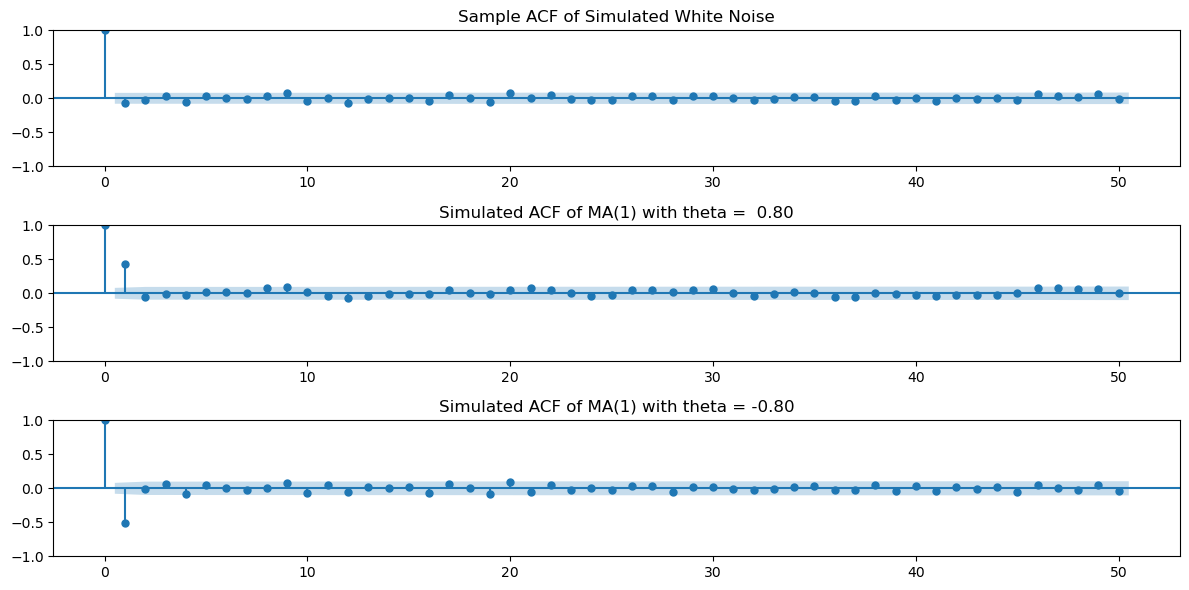

In [192]:
from statsmodels.graphics.tsaplots import plot_acf
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (12, 6))

sample_acf_vals_wn = sample_acf(y_wn, h_max)
plot_acf(y_wn, lags = h_max, ax = axes[0])
axes[0].set_title('Sample ACF of Simulated White Noise')

sample_acf_vals_ma_1 = sample_acf(y_ma_1, h_max)
plot_acf(y_ma_1, lags = h_max, ax = axes[1])
theta = 0.8
axes[1].set_title(f'Simulated ACF of MA(1) with theta = {theta: .2f}')

sample_acf_vals_ma_2 = sample_acf(y_ma_2, h_max)
plot_acf(y_ma_2, lags = h_max, ax = axes[2])
theta = -0.8
axes[2].set_title(f'Simulated ACF of MA(1) with theta = {theta: .2f}')

plt.tight_layout()
plt.show()

There are also real datasets whose sample ACF displays the above MA(1) behavior. Here is one example. 

## Varve Dataset

This dataset is from the Shumway and Stoffer book. It records the thickness of yearly glacial varves—layers of sediment deposited by melting glaciers—collected from a single site in Massachusetts. Each varve represents one year of sedimentation, formed when meltwater streams carried sand and silt into a glacial lake during the spring and summer melt seasons at the end of the last Ice Age. The dataset contains 634 annual measurements, covering a continuous period that began about 11,834 years ago, when the glaciers in New England were retreating. Thicker varves indicate warmer years with more melting and heavier sediment flow, while thinner varves reflect colder years with less melting. Although these deposits stopped forming thousands of years ago when the glacial lake drained, the preserved layers now provide scientists with a high-resolution record of past climate variations, helping reconstruct temperature and melting patterns during the planet’s transition out of the Ice Age.

See Example 2.6 of the Shumway-Stoffer book, 4th edition, for more details on the dataset.

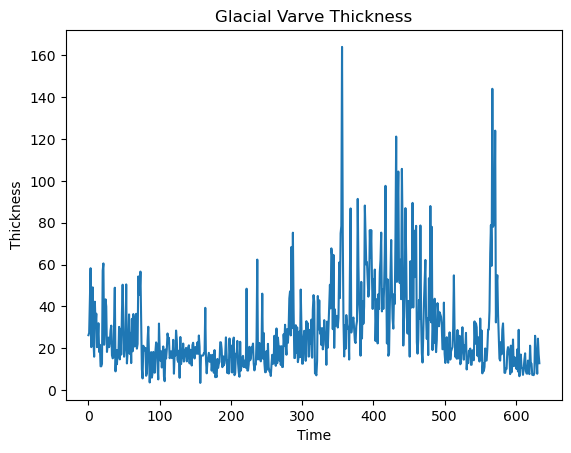

In [193]:
varve_data = pd.read_csv("varve.csv")
yraw = varve_data['x']
plt.plot(yraw)
plt.xlabel('Time')
plt.ylabel('Thickness')
plt.title('Glacial Varve Thickness')
plt.show()

We shall work with the logarithms of the raw data. 

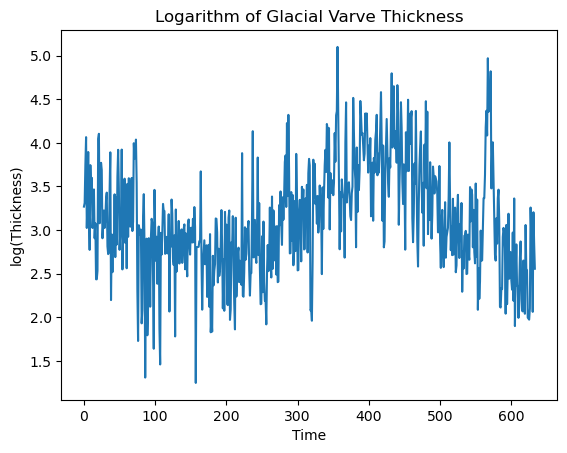

In [194]:
#We shall work with the logarithms: 
ylog = np.log(yraw)
plt.plot(ylog)
plt.xlabel('Time')
plt.ylabel('log(Thickness)')
plt.title('Logarithm of Glacial Varve Thickness')
plt.show()

Fitting a stationary model such as MA($q$) is not appropriate for the logarithmed data. This is because the data does not seem to have constant mean. To deal with this, we difference the data as follows. 

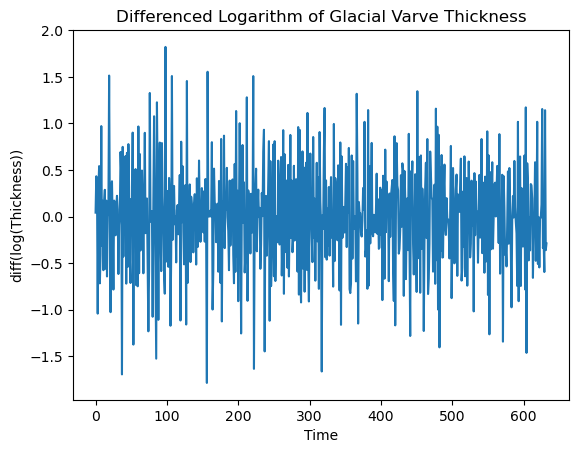

In [195]:
ylogdiff = np.diff(ylog)
plt.plot(ylogdiff)
plt.xlabel('Time')
plt.ylabel('diff(log(Thickness))')
plt.title('Differenced Logarithm of Glacial Varve Thickness')
plt.show()

Now let us look at the sample acf of this dataset. 

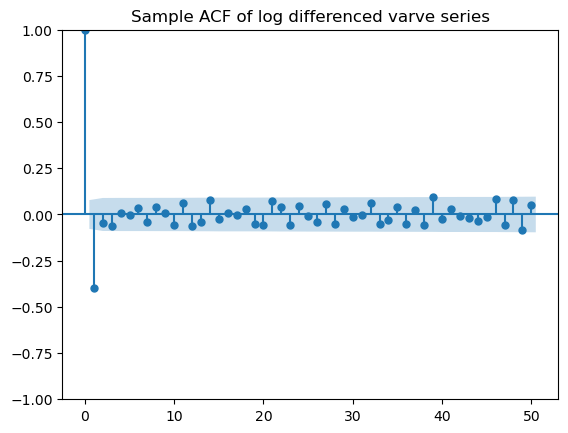

In [196]:
h_max = 50
fig, ax = plt.subplots() 
plot_acf(ylogdiff, lags = h_max, ax = ax)
ax.set_title("Sample ACF of log differenced varve series")
plt.show()

It is clear that the sample ACF shows one negative nonnegligible spike at lag one.  The other spikes seem insignificant. This is MA(1) behaviour which suggests that the MA(1) should be appropriate for this data (which is differenced logarithms of the varve data). 

## Fitting MA models using the ARIMA function

Fitting MA models to data is more complicated compared to AR models. We use an inbuilt function in statsmodels called ARIMA for this. ARIMA models (which we will define later) are determined by three orders $(p, d, q)$. $p$ denotes the AR order, $q$ denotes the MA order, and $d$ denotes differencing. To fit the MA(1) model, we take $p = 0, d = 0$ and $q = 1$. 

In [197]:
from statsmodels.tsa.arima.model import ARIMA
mamod = ARIMA(ylogdiff, order = (0, 0, 1)).fit()
print(mamod.summary())
print(mamod.params)
mu_hat = mamod.params[0]
theta_hat = mamod.params[1]
sigma_hat = np.sqrt(mamod.params[2])
print(f"mu_hat = {mu_hat: .4f}, theta_hat = {theta_hat: .4f}, sigma_hat = {sigma_hat: .4f}")

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  633
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -440.678
Date:                Sat, 15 Nov 2025   AIC                            887.356
Time:                        22:14:29   BIC                            900.707
Sample:                             0   HQIC                           892.541
                                - 633                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0013      0.004     -0.280      0.779      -0.010       0.008
ma.L1         -0.7710      0.023    -33.056      0.000      -0.817      -0.725
sigma2         0.2353      0.012     18.881      0.0

This ARIMA function can be applied on the log varve data also, instead of first differencing and then applying it on the differenced log data. If we are not using differencing data, we have to use d = 1 in the ARIMA function (i.e., $(p, d, q)
$  = $(0, 1, 1)$). 

In [198]:
mamod_ylog = ARIMA(ylog, order = (0, 1, 1)).fit()
print(mamod_ylog.summary())


                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                  634
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -440.718
Date:                Sat, 15 Nov 2025   AIC                            885.435
Time:                        22:14:30   BIC                            894.336
Sample:                             0   HQIC                           888.892
                                - 634                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7705      0.023    -32.948      0.000      -0.816      -0.725
sigma2         0.2353      0.012     19.124      0.000       0.211       0.259
Ljung-Box (L1) (Q):                   9.10   Jarque-

Note now that there is no constant. This ARIMA function, by default, fits $y_t = \epsilon_t + \theta \epsilon_{t-1}$ (with no $\mu$ i.e., with $\mu = 0$) if the differencing order is strictly positive. 

## MA(2) model


The MA(2) model is: $y_t = \mu + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2}$. For this dataset, there are autocorrelations between $y_t$ and $y_{t-1}$ as well as between $y_t$ and $y_{t-2}$. To understand these autocorrelations, we can look at the theoretical ACF of MA(2). 

[1.         0.22222222 0.18518519 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


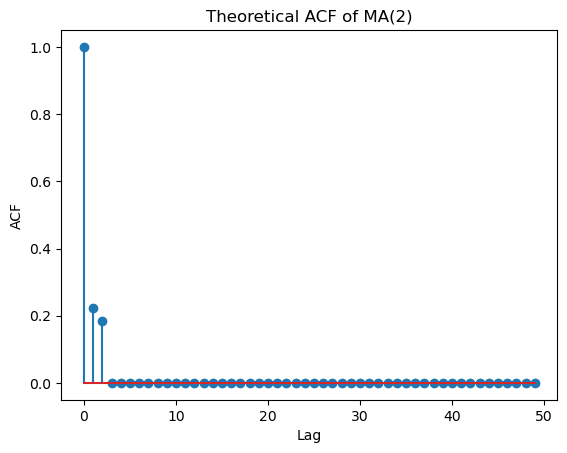

In [199]:
from statsmodels.tsa.arima_process import arma_acf
ar = [1]
ma = [1, 0.2, 0.2] #this is for MA(2) with theta_1 = 0.2 and theta_2 = 0.2
lag_max = 50
acf_vals = arma_acf(ar, ma, lags = lag_max)
print(acf_vals)
plt.stem(range(len(acf_vals)), acf_vals)
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.title("Theoretical ACF of MA(2)")
plt.show()

If we simulate data from this MA(2) model, the resulting data will have a sample ACF that looks like a noisy version of the above theoretical ACF. 

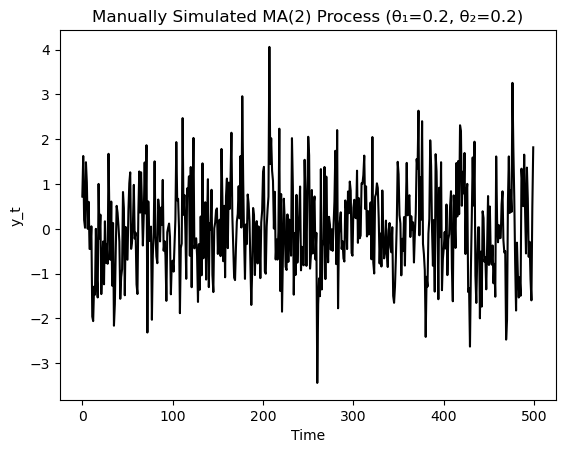

In [200]:
theta1 = 0.2
theta2 = 0.2
n = 500
#First generate \epsilon_t
np.random.seed(42)
eps = np.random.normal(0, 1, n+2)

y = np.zeros(n)
for t in range(2, n+2):
    y[t-2] = eps[t] + theta1 * eps[t-1] + theta2 * eps[t-2]

# Plot the simulated series
plt.plot(y, color='black')
plt.title("Manually Simulated MA(2) Process (θ₁=0.2, θ₂=0.2)")
plt.xlabel("Time")
plt.ylabel("y_t")
plt.show()

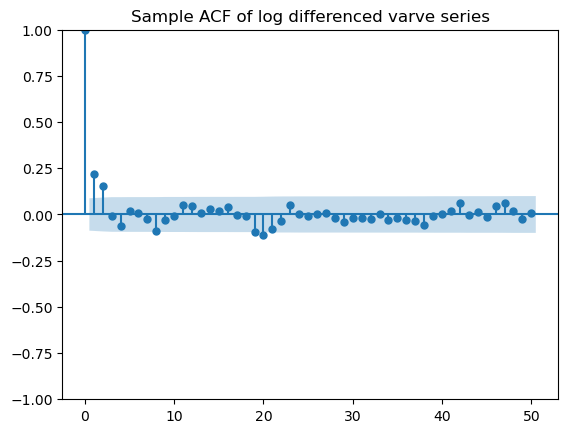

In [201]:
h_max = 50
fig, ax = plt.subplots() 
plot_acf(y, lags = h_max, ax = ax)
ax.set_title("Sample ACF of log differenced varve series")
plt.show()

## GDP Growth Rate Data

Our second dataset is the GDP growth rate data. This can be calculated from the raw GDP data by first taking the logarithms, and then differencing the logarithms. Because, this is a common preprocessing, one can directly obtain the growth rate data from FRED (https://fred.stlouisfed.org/series/A191RP1Q027SBEA).  

  observation_date      GDP
0       1947-01-01  243.164
1       1947-04-01  245.968
2       1947-07-01  249.585
3       1947-10-01  259.745
4       1948-01-01  265.742


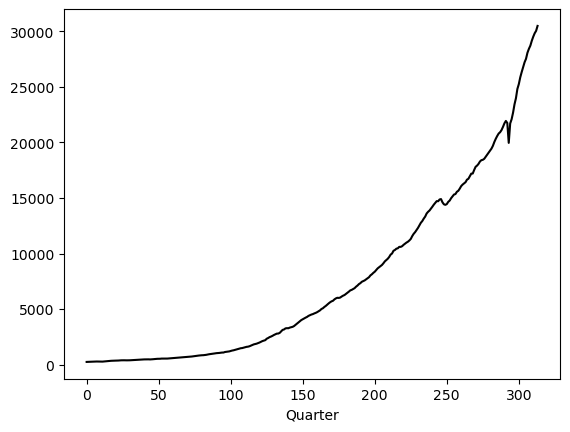

In [202]:
gdp = pd.read_csv("GDP_12Nov2025.csv")
print(gdp.head())
y = gdp['GDP'].to_numpy()
plt.plot(y, color = 'black')
plt.xlabel('Quarter')
plt.show()

We cannot fit MA models directly to this dataset. So we do the usual preprocessing by first taking logarithms and then differences. 

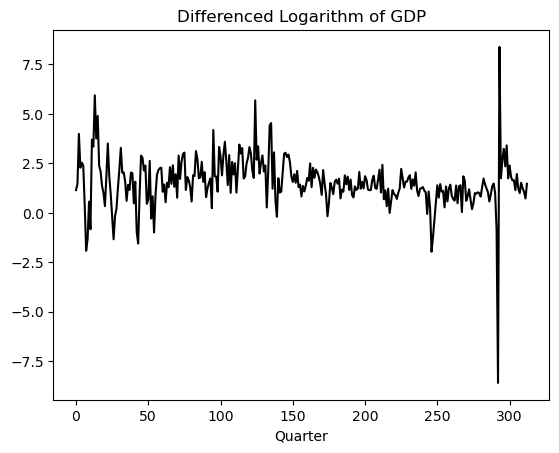

In [203]:
ylog = np.log(y)
ylogdiff = np.diff(ylog)*100
plt.plot(ylogdiff, color = 'black')
plt.xlabel('Quarter')
plt.title('Differenced Logarithm of GDP')
plt.show()

Let us compute the sample acf of this dataset. 

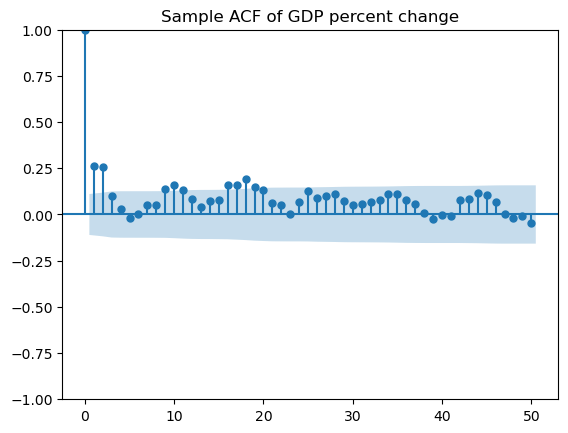

In [204]:
h_max = 50
fig, ax = plt.subplots() 
plot_acf(ylogdiff, lags = h_max, ax = ax)
ax.set_title("Sample ACF of GDP percent change")
plt.show()

There are two spikes sticking out at lags 1 and 2. This indicates that MA(2) is a reasonable model. We fit MA(2) by using the ARIMA function as follows. 

In [205]:
mamod = ARIMA(ylogdiff, order = (0, 0, 2)).fit()
print(mamod.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  313
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -503.717
Date:                Sat, 15 Nov 2025   AIC                           1015.435
Time:                        22:14:36   BIC                           1030.419
Sample:                             0   HQIC                          1021.423
                                - 313                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5418      0.118     13.081      0.000       1.311       1.773
ma.L1          0.1893      0.026      7.250      0.000       0.138       0.240
ma.L2          0.2232      0.060      3.749      0.0

Fitting MA models is more complicated compared to fitting AR models. This can lead to some numerical issues. For example, in the above code if you fit the MA(2) model to ylogdiff = np.diff(np.log(y)), you might get a warning saying the optimization for computing the MLE is not converging. The warning seems to go away if you work with np.diff(np.log(y))*100 (now you are multiplying by 100). 

## AR Models

Let us now see if AR models can be fit to the GDP growth rate data. The sample PACF gives an indication of a good value of $p$ for which AR($p$) is reasonable. 

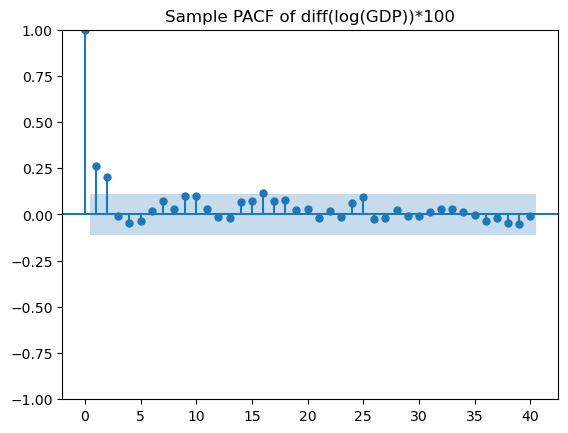

In [206]:
p_max = 40
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(ylogdiff, lags = p_max)
plt.title("Sample PACF of diff(log(GDP))*100")
plt.show()


We can fit the AR model using AutoReg (as we have been doing previously). We can also use the ARIMA function with order $(p, 0, 0)$ (you will see in the Monday section). 

In [207]:
from statsmodels.tsa.ar_model import AutoReg
armod = AutoReg(ylogdiff, lags = 2).fit()
print(armod.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  313
Model:                     AutoReg(2)   Log Likelihood                -499.916
Method:               Conditional MLE   S.D. of innovations              1.207
Date:                Sat, 15 Nov 2025   AIC                           1007.833
Time:                        22:14:39   BIC                           1022.792
Sample:                             2   HQIC                          1013.812
                                  313                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9099      0.125      7.293      0.000       0.665       1.154
y.L1           0.2100      0.056      3.780      0.000       0.101       0.319
y.L2           0.2010      0.056      3.616      0.0

AutoReg fit a causal stationary model (because the roots have moduli strictly larger than 1) to the data. 

This AR(2) model fit the equation (below $x_t$ is $\left(\log(GDP_t) - \log(GDP_{t-1}) \right) * 100$). 
\begin{equation*}
   x_t = 0.9099 + 0.21 x_{t-1} + 0.2010 x_{t-2} + \delta_t
\end{equation*}
where $\delta_t \overset{\text{i.i.d}}{\sim} N(0, 1.207^2)$
But when we used the MA(2) model, we got the equation: 
\begin{equation*}
x_t = 1.5418 + \epsilon_t + 0.1893 \epsilon_{t-1} + 0.2232 \epsilon_{t-2}
\end{equation*}
with $\epsilon_t \overset{\text{i.i.d}}{\sim} N(0, 1.4628)$. Since both these models are fit to the same dataset, it makes sense to ask if they are similar models in some sense. This is actually true, and it can be verified in a few ways. First note that the mean of the MA(2) model is clearly 1.5418. For computing the mean of the AR(2) model $x_t = 0.9099 + 0.21 x_{t-1} + 0.2010 x_{t-2} + \delta_t$, take expectation on both sides ($\delta_t$ has mean zero and, by stationarity each of $x_t$, $x_{t-1}$ and $x_{t-2}$ have the same mean $\mu$) to get 
\begin{align*}
   \mu = 0.9099 + 0.21 \mu + 0.2010 \mu \implies \mu = \frac{0.9099}{1 - 0.21 - 0.201} = 1.5446
\end{align*}
So the two means are almost the same. 

In [208]:
print(armod.params[0]/(1 - armod.params[1] - armod.params[2]))

1.5446358356501164


Next let us compute the AutoCovariance values of the two models. There is an inbuilt function called \texttt{arma_acovf} which computes autocovariance. 

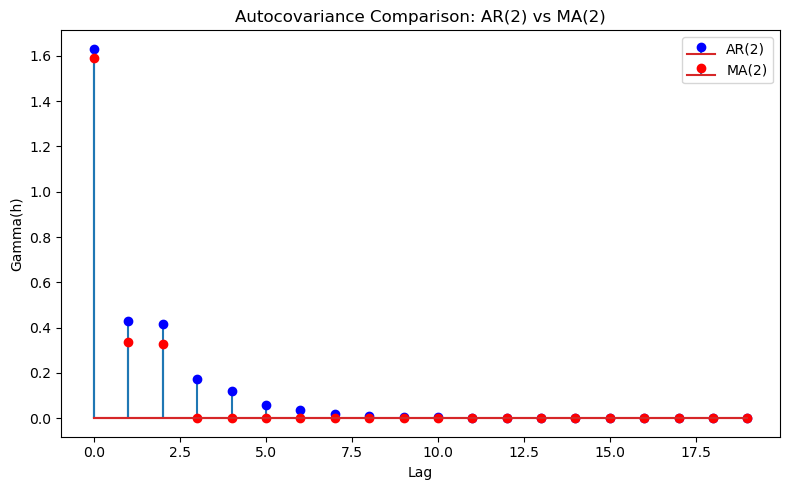

In [214]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import arma_acovf

# ---- AR(2) model ----
ar = np.array([1, -0.21, -0.2010])   # AR polynomial
ma = np.array([1])                   # no MA terms
sigma2 = 1.207**2

acov_ar2 = arma_acovf(ar=ar, ma=ma, sigma2=sigma2, nobs=20)

# ---- MA(2) model ----
ar2 = np.array([1])
ma2 = np.array([1, 0.1893, 0.2232])
sigma2_ma = 1.4628

acov_ma2 = arma_acovf(ar=ar2, ma=ma2, sigma2=sigma2_ma, nobs=20)

# ---- Plot both ----
plt.figure(figsize=(8,5))

lags = np.arange(len(acov_ar2))

plt.stem(lags, acov_ar2, markerfmt='bo', label="AR(2)")
plt.stem(lags, acov_ma2, markerfmt='ro', label="MA(2)")

plt.title("Autocovariance Comparison: AR(2) vs MA(2)")
plt.xlabel("Lag")
plt.ylabel("Gamma(h)")
plt.legend()
plt.tight_layout()
plt.show()


The autocovariances of the two models are somewhat close to each other. This suggests that the AR(2) and MA(2) models are not very different from each other. 

## ARIMA Modeling

We apply the Box-Jenkins philosophy to a real dataset from FRED. The Box-Jenkins philosophy deals with nonstationarity by differencing, and then attempts to fit a **causal, stationary** AR models  to the  differenced data.  

### TTLCONS data

The following data gives the monthly total construction spending in the United States (after taking logs)

  observation_date  TTLCONS
0       1993-01-01   458080
1       1993-02-01   462967
2       1993-03-01   458399
3       1993-04-01   469425
4       1993-05-01   468998
391


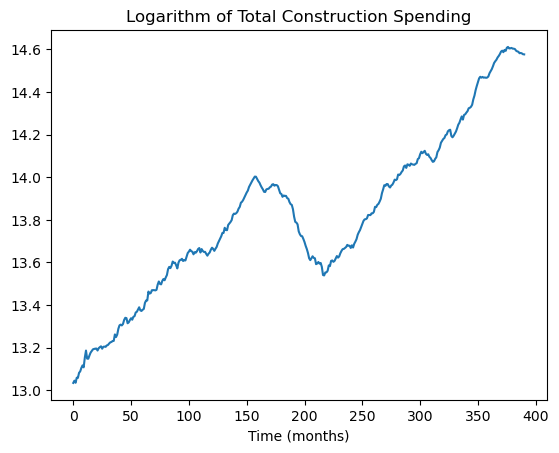

In [163]:
ttlcons = pd.read_csv('TTLCONS_13Nov2025.csv')
print(ttlcons.head())
y = np.log(ttlcons['TTLCONS'])
print(len(y))
plt.plot(y)
plt.title('Logarithm of Total Construction Spending')
plt.xlabel('Time (months)')
plt.show()


It will clearly be not appropriate to fit a causal stationary model to this dataset. So we first difference and visualize the differenced data. 

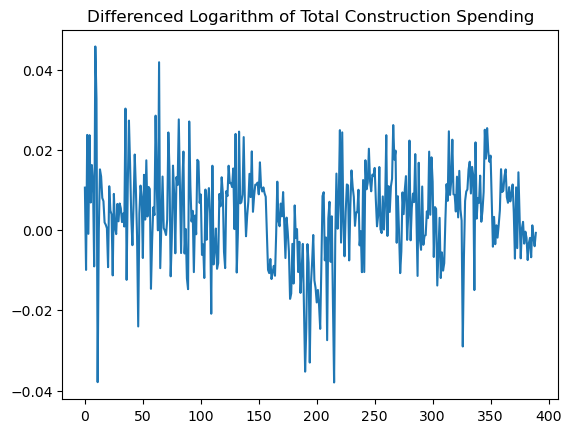

In [164]:
ydiff = np.diff(y)
plt.plot(ydiff)
plt.title('Differenced Logarithm of Total Construction Spending')
plt.show()

Now we look for an appropriate AR($p$) or MA($q$) model to the data. For this, let us first plot the sample ACF and PACF values. 

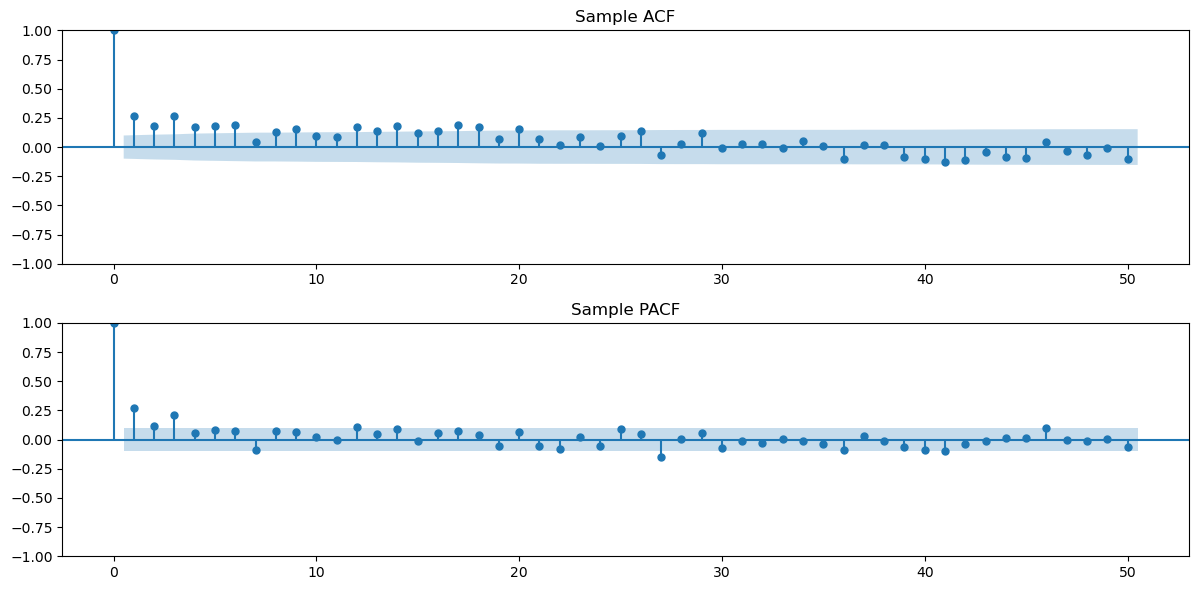

In [165]:
h_max = 50
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (12, 6))
plot_acf(ydiff, lags = h_max, ax = axes[0])
axes[0].set_title("Sample ACF")
plot_pacf(ydiff, lags = h_max, ax = axes[1])
axes[1].set_title("Sample PACF")
plt.tight_layout()
plt.show()

The sample PACF appears to be negligible after lag 3. This suggests fitting an AR(3) model to the data. 

In [167]:
p = 3
armod = AutoReg(ydiff, lags = p).fit()
print(armod.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  390
Model:                     AutoReg(3)   Log Likelihood                1198.770
Method:               Conditional MLE   S.D. of innovations              0.011
Date:                Thu, 13 Nov 2025   AIC                          -2387.541
Time:                        16:53:22   BIC                          -2367.748
Sample:                             3   HQIC                         -2379.692
                                  390                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0019      0.001      3.159      0.002       0.001       0.003
y.L1           0.2221      0.049      4.491      0.000       0.125       0.319
y.L2           0.0644      0.050      1.278      0.2

From the Modulus values reported near the end of the summary table, it is clear that the fitted AR(3) model is causal and stationary. Let us use the fitted model to predict the future values of the time series. Because the model is fitted to the differenced data, we would need to convert it to the original data before makign predictions. The fitted model is: 
\begin{equation*}
    y_t - y_{t-1} = \hat{\phi}_0 + \hat{\phi}_1 \left(y_{t-1} - y_{t-2} \right) + \hat{\phi}_2 \left(y_{t-2} - y_{t-3} \right) + \hat{\phi}_3 \left(y_{t-3} - y_{t-4} \right) + \epsilon_t
\end{equation*}
which is equivalent to
\begin{equation*}
    y_t = \hat{\phi}_0 + \left(1 + \hat{\phi}_1 \right) y_{t-1} + \left(\hat{\phi}_2 - \hat{\phi}_1 \right) y_{t-2} + \left(\hat{\phi}_3 - \hat{\phi}_2 \right) y_{t-3}  - \hat{\phi}_3 y_{t-4} + \epsilon_t
\end{equation*}
This is an AR(4) model and we can predict using it in the usual way as follows. 

This AR(4) model is for the original data, and will not be stationary as can be checked below.

In [168]:
phi0_hat, phi1_hat, phi2_hat, phi3_hat = armod.params

# Convert differenced AR(3) model to AR(4) model for the original data
a1 = 1 + phi1_hat
a2 = phi2_hat - phi1_hat
a3 = phi3_hat - phi2_hat
a4 = -phi3_hat

# Characteristic polynomial: 1 - a1*z - a2*z^2 - a3*z^3 - a4*z^4 = 0
coeffs = [1, -a1, -a2, -a3, -a4]
roots = np.roots(coeffs)
moduli = np.abs(roots)

# Display results
print("AR(4) coefficients (on original data):")
print(f"a1 = {a1:.4f}, a2 = {a2:.4f}, a3 = {a3:.4f}, a4 = {a4:.4f}\n")

print("Roots of the characteristic polynomial:")
for i, r in enumerate(roots, 1):
    print(f"Root {i}: {r:.4f},  Modulus: {moduli[i-1]:.4f}")

# Check for stationarity
if np.all(moduli > 1):
    print("The model is causal and stationary.")
else:
    print("The model is NOT stationary (some roots have modulus ≤ 1).")

AR(4) coefficients (on original data):
a1 = 1.2221, a2 = -0.1577, a3 = 0.1433, a4 = -0.2077

Roots of the characteristic polynomial:
Root 1: 1.0000+0.0000j,  Modulus: 1.0000
Root 2: 0.7166+0.0000j,  Modulus: 0.7166
Root 3: -0.2472+0.4783j,  Modulus: 0.5384
Root 4: -0.2472-0.4783j,  Modulus: 0.5384
The model is NOT stationary (some roots have modulus ≤ 1).


Predictions can be made based on the AR(4) model fitted above. 

In [169]:
#The following are the coefficients of the above AR(4) model: 
phi_vals = np.array([armod.params[0], armod.params[1] + 1, armod.params[2] - armod.params[1], armod.params[3]-armod.params[2], -armod.params[3]])
print(phi_vals)
k = 100
n = len(y)
yhat = np.concatenate([y.astype(float), np.full(k, -9999)]) #extend data by k placeholder values
p = len(phi_vals)-1
for i in range(1, k+1):
    ans = phi_vals[0]
    for j in range(1, p+1):
        ans += phi_vals[j] * yhat[n+i-j-1]
    yhat[n+i-1] = ans
predvalues = yhat[n:]
print(predvalues)

[ 0.00194823  1.22210763 -0.15767478  0.14326653 -0.20769939]
[14.5770252  14.57834935 14.58052477 14.58327511 14.5862494  14.58948729
 14.59291757 14.59645407 14.60008131 14.60377551 14.6075125  14.61128214
 14.61507571 14.61888557 14.62270738 14.62653787 14.63037443 14.63421539
 14.63805951 14.64190589 14.64575388 14.64960303 14.65345301 14.65730359
 14.66115459 14.6650059  14.66885742 14.67270911 14.67656091 14.68041278
 14.68426472 14.68811669 14.6919687  14.69582073 14.69967277 14.70352482
 14.70737688 14.71122895 14.71508102 14.71893309 14.72278517 14.72663724
 14.73048932 14.7343414  14.73819348 14.74204556 14.74589764 14.74974972
 14.7536018  14.75745388 14.76130596 14.76515804 14.76901012 14.7728622
 14.77671428 14.78056636 14.78441844 14.78827052 14.7921226  14.79597468
 14.79982677 14.80367885 14.80753093 14.81138301 14.81523509 14.81908717
 14.82293925 14.82679133 14.83064341 14.83449549 14.83834757 14.84219965
 14.84605173 14.84990381 14.85375589 14.85760797 14.86146005 14

Let us plot these predictions along with the original data (on the log-scale and then on the orginal scale).

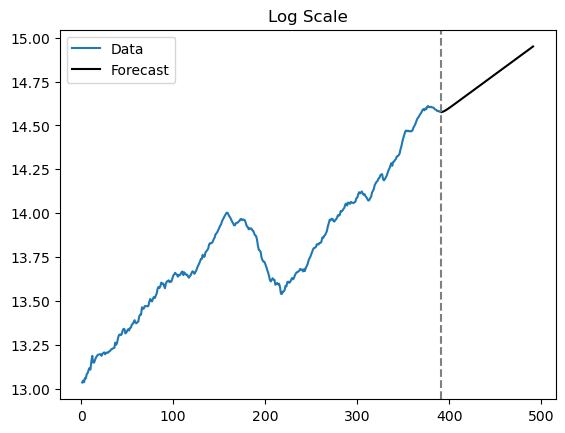

In [170]:
tme = range(1, n+1)
tme_future = range(n+1, n+k+1)
plt.plot(tme, y, label = 'Data')
plt.plot(tme_future, predvalues, label = 'Forecast', color = 'black')
plt.axvline(x=n, color='gray', linestyle='--')
plt.title('Log Scale')
plt.legend()
plt.show()

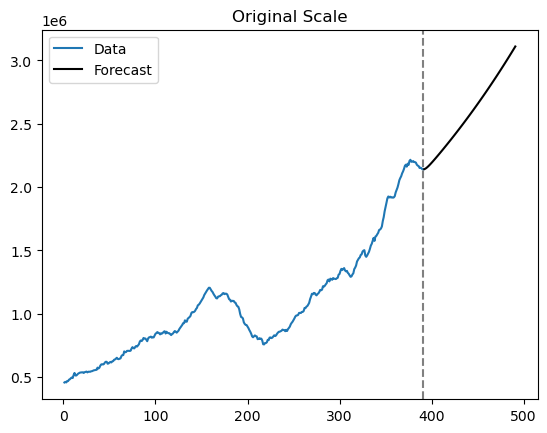

In [129]:
tme = range(1, n+1)
tme_future = range(n+1, n+k+1)
plt.plot(tme, np.exp(y), label = 'Data')
plt.plot(tme_future, np.exp(predvalues), label = 'Forecast', color = 'black')
plt.axvline(x=n, color='gray', linestyle='--')
plt.title('Original Scale')
plt.legend()
plt.show()

### AR(3) without intercept

To illustrate a technical point, suppose that we don't want an intercept term while fitting the AR(3) model after differencing. We can do this by setting **trend = 'n'** in AutoReg as follows.

In [171]:
p = 3
armod_nointercept = AutoReg(ydiff, lags = p, trend = 'n').fit()
print(armod_nointercept.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  390
Model:                     AutoReg(3)   Log Likelihood                1193.843
Method:               Conditional MLE   S.D. of innovations              0.011
Date:                Thu, 13 Nov 2025   AIC                          -2379.686
Time:                        16:54:50   BIC                          -2363.852
Sample:                             3   HQIC                         -2373.408
                                  390                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
y.L1           0.2542      0.049      5.185      0.000       0.158       0.350
y.L2           0.0923      0.050      1.837      0.066      -0.006       0.191
y.L3           0.2400      0.049      4.909      0.0

The above AR(3) model is also in the causal stationary regime. It can be converted to the following AR(4) model for the original (undifferenced) $y_t$: 
\begin{equation*}
   y_t = (1 + \hat{\phi}_1) y_{t-1} + (\hat{\phi}_2 - \hat{\phi}_1) y_{t-2} + (\hat{\phi}_3 - \hat{\phi}_2) y_{t-3} - \hat{\phi}_3 y_{t-4} + \epsilon_t. 
\end{equation*}

In [172]:
print(armod_nointercept.params)
phi_vals_nointercept = np.array([0, armod_nointercept.params[0] + 1, armod_nointercept.params[1] - armod_nointercept.params[0], armod_nointercept.params[2]-armod_nointercept.params[1], -armod_nointercept.params[2]])  
print(phi_vals_nointercept)

[0.25418633 0.09234799 0.2400083 ]
[ 0.          1.25418633 -0.16183835  0.14766032 -0.2400083 ]


Predictions using this AR model (which does not have an intercept) are computed as follows. 

In [173]:
yhat = np.concatenate([y.astype(float), np.full(k, -9999)]) #extend data by k placeholder values
p = len(phi_vals_nointercept)-1
for i in range(1, k+1):
    ans = phi_vals_nointercept[0]
    for j in range(1, p+1):
        ans += phi_vals_nointercept[j] * yhat[n+i-j-1]
    yhat[n+i-1] = ans
predvalues_nointercept = yhat[n:]
print(predvalues_nointercept)

[14.57487898 14.57359749 14.57301636 14.57250515 14.57201397 14.57170244
 14.5714552  14.57124569 14.57109484 14.57097781 14.57088384 14.57081295
 14.57075816 14.57071513 14.57068212 14.57065661 14.57063675 14.57062142
 14.57060957 14.57060037 14.57059326 14.57058776 14.5705835  14.5705802
 14.57057765 14.57057567 14.57057414 14.57057296 14.57057204 14.57057133
 14.57057078 14.57057036 14.57057003 14.57056977 14.57056958 14.57056942
 14.5705693  14.57056921 14.57056914 14.57056909 14.57056905 14.57056901
 14.57056899 14.57056897 14.57056895 14.57056894 14.57056893 14.57056892
 14.57056892 14.57056891 14.57056891 14.57056891 14.57056891 14.57056891
 14.5705689  14.5705689  14.5705689  14.5705689  14.5705689  14.5705689
 14.5705689  14.5705689  14.5705689  14.5705689  14.5705689  14.5705689
 14.5705689  14.5705689  14.5705689  14.5705689  14.5705689  14.5705689
 14.5705689  14.5705689  14.5705689  14.5705689  14.5705689  14.5705689
 14.5705689  14.5705689  14.5705689  14.5705689  14.5705

Let us plot the different predictions together. 

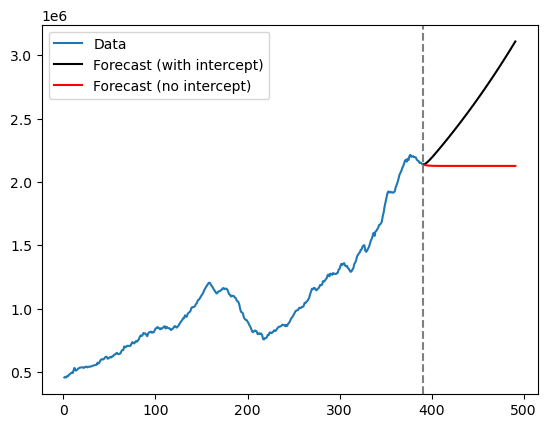

In [174]:
plt.plot(tme, np.exp(y), label = 'Data')
plt.plot(tme_future, np.exp(predvalues), label = 'Forecast (with intercept)', color = 'black')
plt.plot(tme_future, np.exp(predvalues_nointercept), label = 'Forecast (no intercept)', color = 'red') 
plt.axvline(x=n, color='gray', linestyle='--')
plt.legend()
plt.show()

The two predictions are quite different. The absence of the intercept term seems to make a big difference in the predictions in this example. 

### Model Fitting and Prediction using the function ARIMA

Below, we fit the AR(3) model to the differenced data $y_t - y_{t-1}$ using the ARIMA function with order $(3, 1, 0)$. Note that the ARIMA function is applied directly to the original data $y_t$ (and not to the differenced series). 

In [175]:
ar_arima = ARIMA(y, order = (3, 1, 0)).fit()
print(ar_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                TTLCONS   No. Observations:                  391
Model:                 ARIMA(3, 1, 0)   Log Likelihood                1200.965
Date:                Thu, 13 Nov 2025   AIC                          -2393.930
Time:                        16:56:04   BIC                          -2378.066
Sample:                             0   HQIC                         -2387.642
                                - 391                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2542      0.046      5.516      0.000       0.164       0.345
ar.L2          0.0923      0.042      2.217      0.027       0.011       0.174
ar.L3          0.2400      0.045      5.293      0.0

One thing to note is that the ARIMA function does not fit a intercept term by default when the differencing order $d \geq 1$. Below we obtain forecasts for the data using the fitted ARIMA model. The predictions outputted by the get_prediction() function directly applies to $y_t$ (there is no need to do any conversion of the predictions of the differenced series to predictions of the original series; these conversions are automatically done by the get_prediction() function).

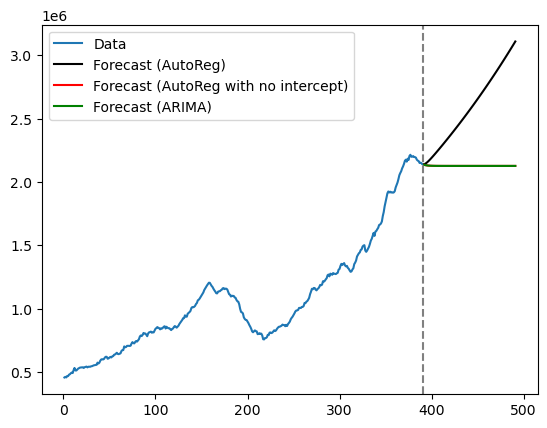

In [176]:
fcast = ar_arima.get_prediction(start = n, end = n+k-1) 
fcast_mean = fcast.predicted_mean #this gives the point predictions
plt.plot(tme, np.exp(y), label = 'Data')
plt.plot(tme_future, np.exp(predvalues), label = 'Forecast (AutoReg)', color = 'black')
plt.plot(tme_future, np.exp(predvalues_nointercept), label = 'Forecast (AutoReg with no intercept)', color = 'red') 
plt.plot(tme_future, np.exp(fcast_mean), label = 'Forecast (ARIMA)', color = 'green')
plt.axvline(x=n, color='gray', linestyle='--')
plt.legend()
plt.show()

The predictions obtained by the ARIMA model coincide with those obtained by the AutoReg model with no intercept. 

### Double Differenced Data (ARIMA models with d = 2)

The differenced series (ydiff) plotted above might be said to have some trends. One can get rid of these by differencing the series again. 

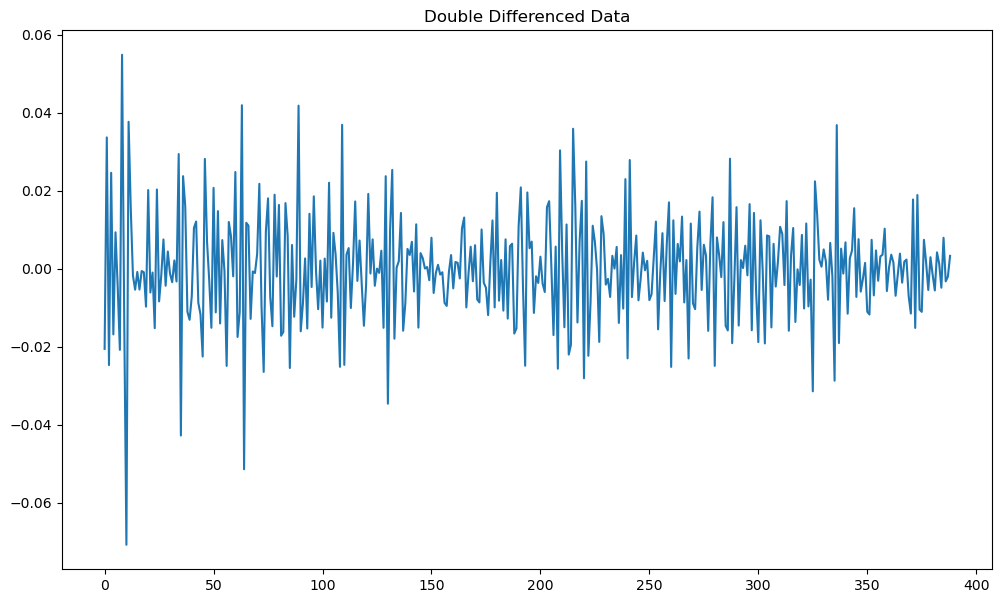

In [177]:
ydiff2 = np.diff(np.diff(y))
plt.figure(figsize = (12, 7))
plt.plot(ydiff2)
plt.title("Double Differenced Data")
plt.show()

Let us look at the sample acf and pacf of the double differenced data. 

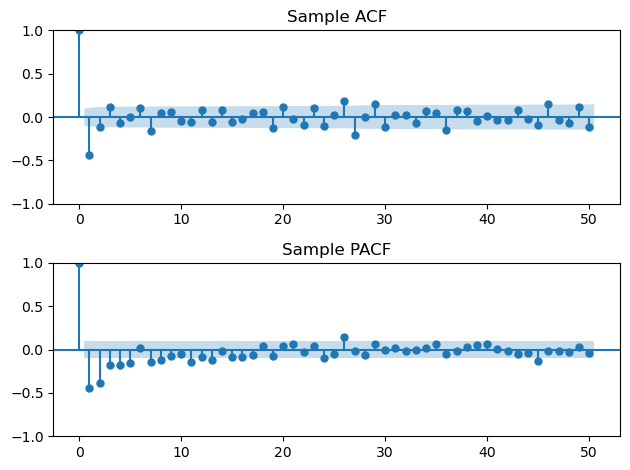

In [178]:
h_max = 50
fig, axes = plt.subplots(nrows = 2, ncols = 1)
plot_acf(ydiff2, lags = h_max, ax = axes[0])
axes[0].set_title("Sample ACF")
plot_pacf(ydiff2, lags = h_max, ax = axes[1])
axes[1].set_title("Sample PACF")
plt.tight_layout()
plt.show()

From the ACF above, MA(1) is a simple model that can be used for this double-difference data. We shall fit this model. Instead of fitting the model to the double-differenced data, we can directly use ARIMA with order (0, 2, 1) to the original data. This model can then be used to obtain forecasts for the original data directly. 

In [179]:
ma_arima = ARIMA(y, order = (0, 2, 1)).fit()
print(ma_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                TTLCONS   No. Observations:                  391
Model:                 ARIMA(0, 2, 1)   Log Likelihood                1199.732
Date:                Thu, 13 Nov 2025   AIC                          -2395.464
Time:                        16:57:39   BIC                          -2387.537
Sample:                             0   HQIC                         -2392.321
                                - 391                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8730      0.026    -33.690      0.000      -0.924      -0.822
sigma2         0.0001   6.74e-06     18.126      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   1.68   Jarque-

The model that is fit here is: $y_t - 2 y_{t-1} + y_{t-2} = \epsilon_t + \theta \epsilon_{t-1}$. Note that there is no mean term $\mu$ on the right hand side. 

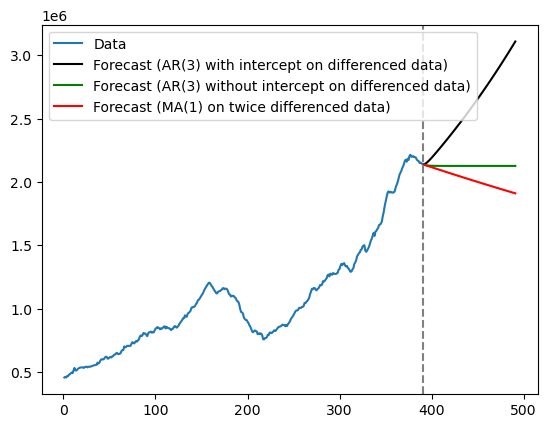

In [180]:
fcast_ma = ma_arima.get_prediction(start = n, end = n+k-1) 
fcast_mean_ma = fcast_ma.predicted_mean #this gives the point predictions
plt.plot(tme, np.exp(y), label = 'Data')
plt.plot(tme_future, np.exp(predvalues), label = 'Forecast (AR(3) with intercept on differenced data)', color = 'black')
plt.plot(tme_future, np.exp(fcast_mean), label = 'Forecast (AR(3) without intercept on differenced data)', color = 'green')
plt.plot(tme_future, np.exp(fcast_mean_ma), label = 'Forecast (MA(1) on twice differenced data)', color = 'red')
plt.axvline(x=n, color='gray', linestyle='--')
plt.legend()
plt.show()

This example illustrates that these different models can give predictions for future data that can behave quite differently.  